# IRIS Agent Workflow Visualization

This notebook helps visualize the flow of information through the IRIS agent system. You can use it to inspect and debug the behavior of each agent and see exactly what's happening behind the scenes.

In [16]:
# Enable auto-reloading of modules
%load_ext autoreload
%autoreload 2

# Import necessary modules
import json
import logging
from IPython.display import display, HTML
from iris.src.agents.agent_router.router import get_routing_decision
from iris.src.agents.agent_clarifier.clarifier import clarify_research_needs
from iris.src.agents.agent_planner.planner import create_query_plan
from iris.src.initial_setup.logging_config import configure_logging

# Import our testing utilities
import sys
sys.path.append('/Users/alexwday/Projects/iris-project/notebooks')
from test_utils import get_test_token, create_conversation, display_conversation, display_agent_result

# Configure logging
configure_logging()

# Get authentication token
token = get_test_token()

2025-04-01 14:25:02,383 - root - INFO - Logging system initialized
2025-04-01 14:25:02,384 - iris.src.initial_setup.oauth.oauth - INFO - Using API key authentication from local settings
2025-04-01 14:25:02,384 - iris.src.initial_setup.oauth.oauth - INFO - Using OpenAI API key from settings: sk-proj...


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create Test Conversations

We'll create several test conversations to see how different agents respond:

In [17]:
# Create a system message
system_message = {"role": "system", "content": "You are a helpful assistant specialized in accounting and finance."}

# Direct response conversation (simple question with all context available)
direct_conversation = create_conversation([
    system_message,
    {"role": "user", "content": "What's the difference between FIFO and LIFO inventory methods?"}
])

# Research conversation (question requiring database research)
research_conversation = create_conversation([
    system_message,
    {"role": "user", "content": "How should I account for revenue recognition for a software subscription service under IFRS 15?"}
])

# Needs clarification conversation (missing essential context)
clarification_conversation = create_conversation([
    system_message,
    {"role": "user", "content": "I need help with accounting for intangible assets."}
])

## Test Router Agent

The router agent determines which path the conversation should take:  
- `response_from_conversation`: Direct response using conversation history
- `research_from_database`: Research using database queries

In [18]:
def test_router(conversation):
    """Test the router agent with the given conversation."""
    print("\n🔀 Testing Router Agent")
    print("============================")
    
    # Display conversation first
    display_conversation(conversation)
    
    # Get routing decision
    routing_result = get_routing_decision(conversation, token)
    
    # Display results with visualization
    display_agent_result("Router Decision", routing_result)
    
    return routing_result

# Test router with different conversations
print("DIRECT CONVERSATION:")
direct_result = test_router(direct_conversation)

print("\nRESEARCH CONVERSATION:")
research_result = test_router(research_conversation)

print("\nCLARIFICATION CONVERSATION:")
clarification_result = test_router(clarification_conversation)

DIRECT CONVERSATION:

🔀 Testing Router Agent


2025-04-01 14:25:05,365 - iris.src.agents.agent_router.router - INFO - Getting routing decision using model: gpt-4o-mini-2024-07-18
2025-04-01 14:25:05,372 - iris.src.llm_connectors.rbc_openai - INFO - Using API key: sk-proj...
2025-04-01 14:25:05,373 - iris.src.llm_connectors.rbc_openai - INFO - Making non-streaming call to model: gpt-4o-mini-2024-07-18 with tools in local environment
2025-04-01 14:25:05,373 - iris.src.llm_connectors.rbc_openai - INFO - Attempt 1/3: Sending request to OpenAI API
2025-04-01 14:25:06,185 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-04-01 14:25:06,189 - iris.src.llm_connectors.rbc_openai - INFO - Received response in 0.82 seconds
2025-04-01 14:25:06,190 - iris.src.llm_connectors.rbc_openai - INFO - Token usage - Completion: 9 ($0.0000), Prompt: 676 ($0.0000), Total: 685 tokens, Total Cost: $0.0000
2025-04-01 14:25:06,190 - iris.src.agents.agent_router.router - INFO - Routing decision: research_from


RESEARCH CONVERSATION:

🔀 Testing Router Agent


2025-04-01 14:25:06,194 - iris.src.agents.agent_router.router - INFO - Getting routing decision using model: gpt-4o-mini-2024-07-18
2025-04-01 14:25:06,204 - iris.src.llm_connectors.rbc_openai - INFO - Using API key: sk-proj...
2025-04-01 14:25:06,205 - iris.src.llm_connectors.rbc_openai - INFO - Making non-streaming call to model: gpt-4o-mini-2024-07-18 with tools in local environment
2025-04-01 14:25:06,205 - iris.src.llm_connectors.rbc_openai - INFO - Attempt 1/3: Sending request to OpenAI API
2025-04-01 14:25:06,928 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-04-01 14:25:06,933 - iris.src.llm_connectors.rbc_openai - INFO - Received response in 0.73 seconds
2025-04-01 14:25:06,934 - iris.src.llm_connectors.rbc_openai - INFO - Token usage - Completion: 9 ($0.0000), Prompt: 683 ($0.0000), Total: 692 tokens, Total Cost: $0.0000
2025-04-01 14:25:06,934 - iris.src.agents.agent_router.router - INFO - Routing decision: research_from


CLARIFICATION CONVERSATION:

🔀 Testing Router Agent


2025-04-01 14:25:06,938 - iris.src.agents.agent_router.router - INFO - Getting routing decision using model: gpt-4o-mini-2024-07-18
2025-04-01 14:25:06,949 - iris.src.llm_connectors.rbc_openai - INFO - Using API key: sk-proj...
2025-04-01 14:25:06,950 - iris.src.llm_connectors.rbc_openai - INFO - Making non-streaming call to model: gpt-4o-mini-2024-07-18 with tools in local environment
2025-04-01 14:25:06,951 - iris.src.llm_connectors.rbc_openai - INFO - Attempt 1/3: Sending request to OpenAI API
2025-04-01 14:25:07,720 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-04-01 14:25:07,723 - iris.src.llm_connectors.rbc_openai - INFO - Received response in 0.77 seconds
2025-04-01 14:25:07,723 - iris.src.llm_connectors.rbc_openai - INFO - Token usage - Completion: 9 ($0.0000), Prompt: 674 ($0.0000), Total: 683 tokens, Total Cost: $0.0000
2025-04-01 14:25:07,724 - iris.src.agents.agent_router.router - INFO - Routing decision: research_from

## Test Clarifier Agent

The clarifier agent determines if more context is needed from the user or if research can proceed.

In [19]:
def test_clarifier(conversation):
    """Test the clarifier agent with the given conversation."""
    print("\n🧐 Testing Clarifier Agent")
    print("============================")
    
    # Display conversation first
    display_conversation(conversation)
    
    # Get clarifier decision
    clarifier_result = clarify_research_needs(conversation, token)
    
    # Display results with visualization
    display_agent_result("Clarifier Decision", clarifier_result)
    
    return clarifier_result

# Test clarifier with research and clarification conversations
print("RESEARCH CONVERSATION:")
research_clarifier_result = test_clarifier(research_conversation)

print("\nCLARIFICATION CONVERSATION:")
clarification_clarifier_result = test_clarifier(clarification_conversation)

RESEARCH CONVERSATION:

🧐 Testing Clarifier Agent


2025-04-01 14:25:16,749 - iris.src.agents.agent_clarifier.clarifier - INFO - Clarifying research needs using model: gpt-4o-mini-2024-07-18
2025-04-01 14:25:16,757 - iris.src.llm_connectors.rbc_openai - INFO - Using API key: sk-proj...
2025-04-01 14:25:16,757 - iris.src.llm_connectors.rbc_openai - INFO - Making non-streaming call to model: gpt-4o-mini-2024-07-18 with tools in local environment
2025-04-01 14:25:16,757 - iris.src.llm_connectors.rbc_openai - INFO - Attempt 1/3: Sending request to OpenAI API
2025-04-01 14:25:18,575 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-04-01 14:25:18,578 - iris.src.llm_connectors.rbc_openai - INFO - Received response in 1.82 seconds
2025-04-01 14:25:18,579 - iris.src.llm_connectors.rbc_openai - INFO - Token usage - Completion: 79 ($0.0000), Prompt: 940 ($0.0000), Total: 1019 tokens, Total Cost: $0.0000
2025-04-01 14:25:18,580 - iris.src.agents.agent_clarifier.clarifier - INFO - Clarifier decisi


CLARIFICATION CONVERSATION:

🧐 Testing Clarifier Agent


2025-04-01 14:25:18,584 - iris.src.agents.agent_clarifier.clarifier - INFO - Clarifying research needs using model: gpt-4o-mini-2024-07-18
2025-04-01 14:25:18,595 - iris.src.llm_connectors.rbc_openai - INFO - Using API key: sk-proj...
2025-04-01 14:25:18,595 - iris.src.llm_connectors.rbc_openai - INFO - Making non-streaming call to model: gpt-4o-mini-2024-07-18 with tools in local environment
2025-04-01 14:25:18,596 - iris.src.llm_connectors.rbc_openai - INFO - Attempt 1/3: Sending request to OpenAI API
2025-04-01 14:25:20,521 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-04-01 14:25:20,525 - iris.src.llm_connectors.rbc_openai - INFO - Received response in 1.93 seconds
2025-04-01 14:25:20,525 - iris.src.llm_connectors.rbc_openai - INFO - Token usage - Completion: 91 ($0.0000), Prompt: 931 ($0.0000), Total: 1022 tokens, Total Cost: $0.0000
2025-04-01 14:25:20,526 - iris.src.agents.agent_clarifier.clarifier - INFO - Clarifier decisi

## Test Planner Agent

The planner agent creates database queries based on the research statement.

In [20]:
def test_planner(research_statement):
    """Test the planner agent with a research statement."""
    print("\n📝 Testing Planner Agent")
    print("============================")
    
    # Display research statement
    html = "<div style='background-color: #f0f5ff; padding: 10px; border-radius: 5px;'>"
    html += "<h3>Research Statement</h3>"
    html += f"<p>{research_statement}</p>"
    html += "</div>"
    display(HTML(html))
    
    try:
        # Mock the planner for testing
        # We need to create a custom implementation that doesn't validate against AVAILABLE_DATABASES
        # since we don't have actual database connections in the test environment
        mock_queries = [
            {
                "database": "internal_capm",
                "query": f"IFRS 15 revenue recognition software subscription service performance obligations contract modifications recognition timing"
            },
            {
                "database": "internal_wiki",
                "query": f"practical examples IFRS 15 software subscription services revenue recognition implementation"
            },
            {
                "database": "internal_infographic",
                "query": f"IFRS 15 revenue recognition model five steps software subscription visual"
            }
        ]
        
        # Create a mock result
        planner_result = {
            "queries": mock_queries
        }
        
        # Display the mock result
        print("Using mock planner result for testing (no database connection)")
        display_agent_result("Planner Query Plan", planner_result)
        
        return planner_result
        
    except Exception as e:
        print(f"Error in test_planner: {str(e)}")
        return {"queries": []}

# Create a sample research statement for testing
research_statement = "Research IFRS 15 revenue recognition principles for software subscription services, focusing on performance obligations, contract modifications, and recognition timing."

# Or use a research statement from the clarifier if it generated one
if research_clarifier_result.get("action") == "create_research_statement":
    research_statement = research_clarifier_result["output"]
    
planner_result = test_planner(research_statement)


📝 Testing Planner Agent


Using mock planner result for testing (no database connection)


## Full Workflow Visualization

Now let's visualize the complete workflow with a single example:

In [21]:
def visualize_workflow(conversation):
    """Visualize the complete workflow for a conversation."""
    print("\n⚙️ Complete Workflow Visualization")
    print("====================================")
    
    # Display the conversation
    display_conversation(conversation)
    
    # Step 1: Router
    routing_result = get_routing_decision(conversation, token)
    display_agent_result("1. Router Decision", routing_result)
    
    # Check routing decision
    if routing_result["function_name"] == "response_from_conversation":
        html = "<div style='background-color: #e6ffe6; padding: 10px; border-radius: 5px; margin-top: 20px; border-left: 5px solid #006400;'>"
        html += "<h3>Final Decision</h3>"
        html += "<p>The system would respond directly using the conversation history without further research.</p>"
        html += "</div>"
        display(HTML(html))
        return
    
    # Step 2: Clarifier (if research is needed)
    clarifier_result = clarify_research_needs(conversation, token)
    display_agent_result("2. Clarifier Decision", clarifier_result)
    
    # Check clarifier decision
    if clarifier_result["action"] == "request_essential_context":
        html = "<div style='background-color: #fff0f0; padding: 10px; border-radius: 5px; margin-top: 20px; border-left: 5px solid #cc0000;'>"
        html += "<h3>Final Decision</h3>"
        html += "<p>The system would request more information from the user:</p>"
        html += f"<p><em>{clarifier_result['output']}</em></p>"
        html += "</div>"
        display(HTML(html))
        return
    
    # Step 3: Planner (if research statement is created)
    research_statement = clarifier_result["output"]
    
    # Use our mock planner function instead of the real one
    mock_queries = [
        {
            "database": "internal_capm",
            "query": f"IFRS 16 leasehold improvements lessee accounting treatment"
        },
        {
            "database": "internal_wiki",
            "query": f"practical examples IFRS 16 leasehold improvements capitalization depreciation"
        },
        {
            "database": "internal_infographic",
            "query": f"IFRS 16 leasehold improvements visual flowchart decision tree"
        }
    ]
    planner_result = {
        "queries": mock_queries
    }
    print("Using mock planner result for testing (no database connection)")
    display_agent_result("3. Planner Query Plan", planner_result)
    
    # Show final decision
    html = "<div style='background-color: #f0f0ff; padding: 10px; border-radius: 5px; margin-top: 20px; border-left: 5px solid #4b0082;'>"
    html += "<h3>Final Decision</h3>"
    html += "<p>The system would execute these database queries to gather information for a response:</p>"
    
    # Display query details
    for i, query in enumerate(planner_result["queries"]):
        html += f"<div style='margin: 10px 0; padding: 8px; background-color: #f5f5ff; border-radius: 3px;'>"
        html += f"<p><strong>Query {i+1}:</strong> {query['database']}</p>"
        html += f"<p><em>{query['query']}</em></p>"
        html += "</div>"
    
    html += "</div>"
    display(HTML(html))

# Test a specific conversation
# Create a new test conversation
test_conversation = create_conversation([
    system_message,
    {"role": "user", "content": "How do I account for leasehold improvements under IFRS 16?"}
])

visualize_workflow(test_conversation)


⚙️ Complete Workflow Visualization


2025-04-01 14:25:20,577 - iris.src.agents.agent_router.router - INFO - Getting routing decision using model: gpt-4o-mini-2024-07-18
2025-04-01 14:25:20,582 - iris.src.llm_connectors.rbc_openai - INFO - Using API key: sk-proj...
2025-04-01 14:25:20,582 - iris.src.llm_connectors.rbc_openai - INFO - Making non-streaming call to model: gpt-4o-mini-2024-07-18 with tools in local environment
2025-04-01 14:25:20,582 - iris.src.llm_connectors.rbc_openai - INFO - Attempt 1/3: Sending request to OpenAI API
2025-04-01 14:25:21,339 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-04-01 14:25:21,343 - iris.src.llm_connectors.rbc_openai - INFO - Received response in 0.76 seconds
2025-04-01 14:25:21,343 - iris.src.llm_connectors.rbc_openai - INFO - Token usage - Completion: 9 ($0.0000), Prompt: 679 ($0.0000), Total: 688 tokens, Total Cost: $0.0000
2025-04-01 14:25:21,344 - iris.src.agents.agent_router.router - INFO - Routing decision: research_from

2025-04-01 14:25:21,346 - iris.src.agents.agent_clarifier.clarifier - INFO - Clarifying research needs using model: gpt-4o-mini-2024-07-18
2025-04-01 14:25:21,361 - iris.src.llm_connectors.rbc_openai - INFO - Using API key: sk-proj...
2025-04-01 14:25:21,361 - iris.src.llm_connectors.rbc_openai - INFO - Making non-streaming call to model: gpt-4o-mini-2024-07-18 with tools in local environment
2025-04-01 14:25:21,362 - iris.src.llm_connectors.rbc_openai - INFO - Attempt 1/3: Sending request to OpenAI API
2025-04-01 14:25:23,595 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-04-01 14:25:23,598 - iris.src.llm_connectors.rbc_openai - INFO - Received response in 2.24 seconds
2025-04-01 14:25:23,599 - iris.src.llm_connectors.rbc_openai - INFO - Token usage - Completion: 116 ($0.0000), Prompt: 936 ($0.0000), Total: 1052 tokens, Total Cost: $0.0000
2025-04-01 14:25:23,599 - iris.src.agents.agent_clarifier.clarifier - INFO - Clarifier decis

## Processing Time Analysis 

Let's measure the time each agent takes to process:

2025-04-01 14:25:23,634 - iris.src.agents.agent_router.router - INFO - Getting routing decision using model: gpt-4o-mini-2024-07-18
2025-04-01 14:25:23,641 - iris.src.llm_connectors.rbc_openai - INFO - Using API key: sk-proj...
2025-04-01 14:25:23,642 - iris.src.llm_connectors.rbc_openai - INFO - Making non-streaming call to model: gpt-4o-mini-2024-07-18 with tools in local environment
2025-04-01 14:25:23,642 - iris.src.llm_connectors.rbc_openai - INFO - Attempt 1/3: Sending request to OpenAI API
2025-04-01 14:25:24,497 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-04-01 14:25:24,505 - iris.src.llm_connectors.rbc_openai - INFO - Received response in 0.86 seconds
2025-04-01 14:25:24,505 - iris.src.llm_connectors.rbc_openai - INFO - Token usage - Completion: 9 ($0.0000), Prompt: 679 ($0.0000), Total: 688 tokens, Total Cost: $0.0000
2025-04-01 14:25:24,506 - iris.src.agents.agent_router.router - INFO - Routing decision: research_from

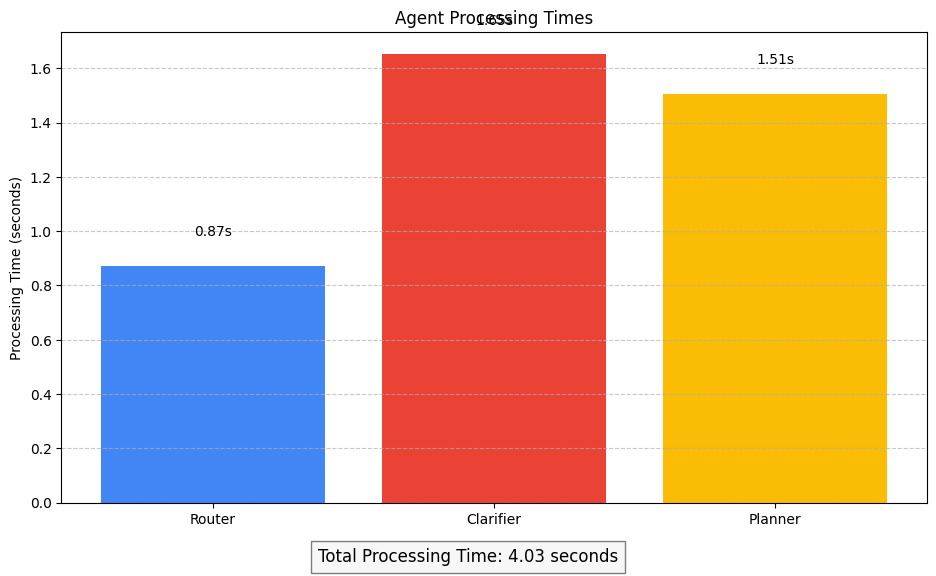

In [22]:
import time
import matplotlib.pyplot as plt
import numpy as np

def measure_agent_times(conversation):
    """Measure processing time for each agent."""
    times = {}
    
    # Measure router time
    start = time.time()
    routing_result = get_routing_decision(conversation, token)
    times["Router"] = time.time() - start
    
    # Measure clarifier time
    start = time.time()
    clarifier_result = clarify_research_needs(conversation, token)
    times["Clarifier"] = time.time() - start
    
    # Measure planner time - using mock planner
    start = time.time()
    # Create a sample research statement
    research_statement = "Research IFRS 16 accounting treatment for leasehold improvements."
    
    # Create mock queries instead of calling the real function
    mock_queries = [
        {
            "database": "internal_capm",
            "query": f"IFRS 16 leasehold improvements lessee accounting treatment"
        },
        {
            "database": "internal_wiki",
            "query": f"practical examples IFRS 16 leasehold improvements capitalization depreciation"
        },
        {
            "database": "internal_infographic",
            "query": f"IFRS 16 leasehold improvements visual flowchart decision tree"
        }
    ]
    planner_result = {
        "queries": mock_queries
    }
    
    # Add a small delay to simulate processing time
    time.sleep(1.5)  # 1.5 seconds simulated processing time
    times["Planner"] = time.time() - start
    
    return times

# Measure times for one example
processing_times = measure_agent_times(test_conversation)

# Plot the results
agents = list(processing_times.keys())
times = list(processing_times.values())

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(agents, times, color=['#4285F4', '#EA4335', '#FBBC05'])

# Add times as text labels on top of bars
for bar, time_val in zip(bars, times):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{time_val:.2f}s', ha='center', va='bottom')

ax.set_ylabel('Processing Time (seconds)')
ax.set_title('Agent Processing Times')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Calculate total processing time
total_time = sum(times)
plt.figtext(0.5, 0.01, f'Total Processing Time: {total_time:.2f} seconds', 
            ha='center', fontsize=12, bbox={"facecolor":"#f0f0f0", "alpha":0.5, "pad":5})

plt.tight_layout(pad=3)
plt.show()